# **People Analytics.**

Introduccion (oreillys).

## Predecir la probabilidad de que un candidato busque un nuevo trabajo.

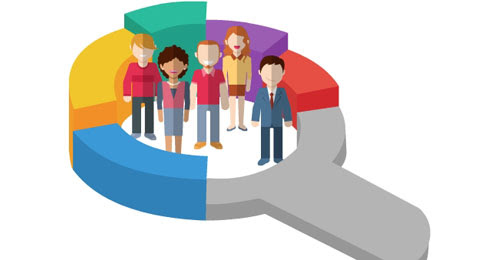

Una empresa activa en Big Data y Data Science quiere contratar científicos de datos entre las personas que superan con éxito algunos cursos que imparte la empresa. Mucha gente se apunta a su formación. La empresa quiere saber cuáles de estos candidatos realmente quieren trabajar para la empresa después de la formación o buscaran un nuevo empleo porque ésto ayuda a reducir  costes y  tiempo, así como la calidad de la formación o la planificación de los cursos y la categorización de los candidatos. La información relacionada con la demografía, la educación y la experiencia está en manos de Recursos Humanos y la inscripción de los candidatos.

Este conjunto de datos está diseñado para comprender los factores que llevan a una persona a dejar su trabajo actual para dedicarse también a investigaciones de recursos humanos. Por modelo (s) que utiliza las credenciales actuales, datos demográficos y datos de experiencia, podrá predecir la probabilidad de que un candidato busque un nuevo trabajo o trabaje para la empresa, además de interpretar los factores afectados en la decisión del empleado.

* Nos encontramos ante un problema de Clasificación.
* Desafios de este Conjunto de datos :
  * El conjunto de datos está desequilibrado.
  * La mayoría de las características son categóricas (nominal, ordinal, binaria).
  * La imputación faltante.

**Objetivo**

Predecir la probabilidad de que un candidato trabaje para la empresa, despues de la formación o busque un nuevo trabajo.
Interpretar el (los) modelo (s) de tal manera que ilustre qué características afectan la decisión del candidato
Consulte la siguiente tarea para obtener más detalles:
https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists/tasks?taskId=3015.


**Objetivo: probabilidad de que un afiliado busque un cambio de trabajo**

 target:

  0 – Not looking for job change,
  
  1 – Looking for a job change. ABANDONO.



<a name="init"></a>
<h1> MI TFM</h1>


<dl>
  <dt><a href="#carga_datos">1. Importación de librerias y Carga de datos</a></dt>
      <dd>Breve Introducción del dataset</dd>
    
  <dt><a href="#target">2. Target</a></
  </dt>
      <dd>Problema Machine Learning: Clasificación. Datos desbalanceados</dd>
    
  <dt><a href="#split_train_test">3. Detección de anomalías</a></dt>
      <dd>Missings. Duplicados. Eliminación de features. Outliers</dd>
    
  <dt><a href="#analisis">4. Análisis y limpieza de los datos</a></dt>
      <dd>Tratamiento de los missings. Análisis de las univariables y de las bivariables.</dd>
    
  <dt><a href="#ML">5. Empezamos Machine Learning</a></dt>
      <dd>Train, Test</dd>
  
    
</dl>

<a name="carga_datos"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 1. Importación de librerias y Carga de datos.
Breve Introducción del dataset.

<img src="./img/ml_types.png" alt="drawing" width="650"/>



In [1]:
# Importamos Librerias.

# data analysis and wrangling
import pandas as pd
import numpy as np
import random 

# visualization
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
!unzip /content/RRHH_Proyecto_final.zip

Archive:  /content/RRHH_Proyecto_final.zip
replace aug_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: aug_test.csv            
  inflating: aug_train.csv           
  inflating: sample_submission.csv   


In [3]:
# Load dataset train 
df = pd.read_csv('aug_train.csv')


In [4]:
df.sort_values(["enrollee_id"])# comprobamos que en esta variable faltan valores.

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
17321,1,city_103,0.920,Male,No relevent experience,no_enrollment,High School,NaN,2,NaN,Pvt Ltd,never,150,0.0
6730,2,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,15,10000+,NGO,3,128,1.0
10024,4,city_103,0.920,Male,No relevent experience,no_enrollment,Masters,STEM,9,50-99,Public Sector,>4,13,0.0
15817,5,city_67,0.855,Male,Has relevent experience,no_enrollment,Masters,STEM,10,<10,Early Stage Startup,1,12,0.0
4552,7,city_136,0.897,Male,Has relevent experience,Full time course,Masters,STEM,13,NaN,NaN,1,18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17935,33375,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,50-99,Public Sector,1,51,0.0
5009,33376,city_16,0.910,Female,Has relevent experience,no_enrollment,Masters,Business Degree,8,1000-4999,Public Sector,4,74,0.0
3351,33377,city_65,0.802,Male,Has relevent experience,no_enrollment,Graduate,Other,10,100-500,Pvt Ltd,2,27,0.0
4756,33379,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,18,<10,Pvt Ltd,2,81,0.0


In [5]:
# eliminamos la columna enrolle_id ya que no nos aporta ningun valor y faltan algunos valores .
df.drop(["enrollee_id"], axis = 'columns', inplace=True)


In [6]:
df.columns # vemos el nombre de las columnas de este dataset.

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

**Features**

* enrollee_id : ID único del candidato.

* city: código de ciudad.

* city_ development _index :  índice de desarrollo de la ciudad (escalado).

* gender: género del candidato.

* relevent_experience: experiencia relevante del candidato.

* enrolled_university: tipo de curso universitario inscrito, si lo hubiera.

* education_level: nivel de educación del candidato.

* major_discipline :disciplina principal de educación del candidato.

* experience: Experiencia total del candidato en años.

* company_size: Número de empleados en la empresa del empleador actual

* company_type : tipo de empleador actual.

* lastnewjob: diferencia en años entre el trabajo anterior y el trabajo actual,es decir, cuantos años lleva en esta empresa.

* training_hours: horas de formación completadas.

* target: 0 - No busca un cambio de trabajo, 1 - Busca un cambio de trabajo.



In [7]:
# Check dataframe basic info
print("Dataset has {0} Rows".format(df.shape[0]))
print("Dataset has {0} Cols".format(df.shape[1]))

Dataset has 19158 Rows
Dataset has 13 Cols


In [8]:
 # Check unique values 
print ("\nUnique values :  \n",df.nunique())


Unique values :  
 city                      123
city_development_index     93
gender                      3
relevent_experience         2
enrolled_university         3
education_level             5
major_discipline            6
experience                 22
company_size                8
company_type                6
last_new_job                6
training_hours            241
target                      2
dtype: int64



<a name="target"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 2. Target
Problema Machine Learning: Clasificación. Datos desbalanceados.

<img src="./img/ml_types.png" alt="drawing" width="650"/>


**Objetivo: probabilidad de que un afiliado busque un cambio de trabajo**

 target:

   0 - No busco cambio de trabajo,
  
   1 - Buscando un cambio de trabajo.

Tenga en cuenta que el conjunto de datos no está equilibrado en la variable. Para corregir este desbalance harremos un undersampling, ya que necesitamos corregir target =1.

El 75% de los inscritos no parecía un cambio de trabajo

25% de los inscritos buscan un cambio de trabajo


Estamos ante un  problema de Clasificación, ya que el target del problema es un conjunto de valores discretos binarios( el empleado no busca/ Busca un nuevo empleo).


0.0    0.750652
1.0    0.249348
Name: target, dtype: float64


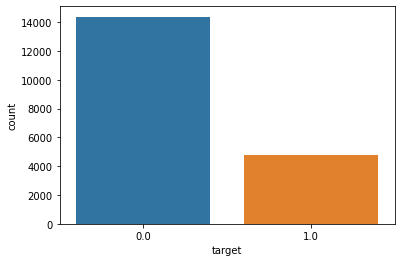

In [9]:
# Visualizamos variable objetivo.
sns.countplot(x=df['target']);
print(df.target.value_counts(normalize=True))


<a name="split_train_test"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 3. Detección de anomalías.

  Missings. Duplicados. Eliminación de features. Outliers

<img src="./img/ml_types.png" alt="drawing" width="650"/>


In [10]:
# Detección de los valores nulos por variables.

null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
9,company_type,6140,32.05
8,company_size,5938,30.99
2,gender,4508,23.53
6,major_discipline,2813,14.68
5,education_level,460,2.40
10,last_new_job,423,2.21
4,enrolled_university,386,2.01
7,experience,65,0.34
0,city,0,0.00
1,city_development_index,0,0.00


In [11]:
# Comprobamos si hay alguna fila duplicada y en su caso las eliminamos.
df.duplicated().sum()


49

In [12]:
df = df.drop_duplicates()
df.duplicated().sum()# comprobamos que se han eliminado correctamente todos los valores duplicados.


0

### OUTLIERS.

#### ¿Qué es un outlier?
Se trata de un valor atípico dentro de nuestros datos. Un valor que se desvía mucho de las métricas estadísticas de centralidad (media, moda, mediana). En el análisis exploratorio de datos suele ser algo a estudiar, el por qué tengo algunos valores atípicos en los datos. No obstante, en machine learning los outliers en los datos implican penalizaciones en los modelos, sobretodo los que trabajan con distancias y con Gradient Descent. Por tanto, hay que lidiar con ellos.

#### ¿Qué gráficas utilizo para visualizar los outliers?
Lo mejor son boxplots, histogramas, diagramas de densidad, scatter plots y count plots para categóricas.

#### ¿Qué técnicas hay para detectar outliers?
1. **Gráficamente**: Datos que se desvien mucho.
2. **Cuartiles**: se ve en un diagrama de caja. Datos que caigan fuera del rango +/- 1.5*IQR. Este 1.5 es muy restrictivo por lo que se suelen probar valores del 3 al 5. Dependerá mucho de cada feature.
3. **Desviación estándar**: todo lo que caiga fuera de (media +/- N*std) de la variable. Normalmente N es un valor de 3 a 5.

#### ¿Qué hago con los outliers?
Tenemos varias opciones:
1. **Eliminarlos**: es la técnica más habitual y sencilla
2. **No hacer nada**: si no son exagerados. Los árboles de decisión y SVM (en este orden) son robustos frente a outliers.
3. **Transformaciones logarítmicas**: elimina asimetría en las features, y por tanto reduce el efecto de los outliers. Para más info<a href="#feat_engi"> ver el apartado de transformaciones.</a>
4. **Binning**: discretiza la variable en varios grupos. Esto me va a permitir incluir los outliers en un grupo donde haya otros datos no considerados como outiers (ver ejemplo abajo)
5. **Imputación**: igual que con los missings, sustituir los valores. Esto tendrá sentido si los outliers están bien analizados, y desde el punto de vista de negocio conviene sustituirlos por un valor concreto.
6. **Tratamiento por separado**: si es un número significativo de outliers quizá merezca la pena separar los datos y tratarlos como otro modelo aparte.



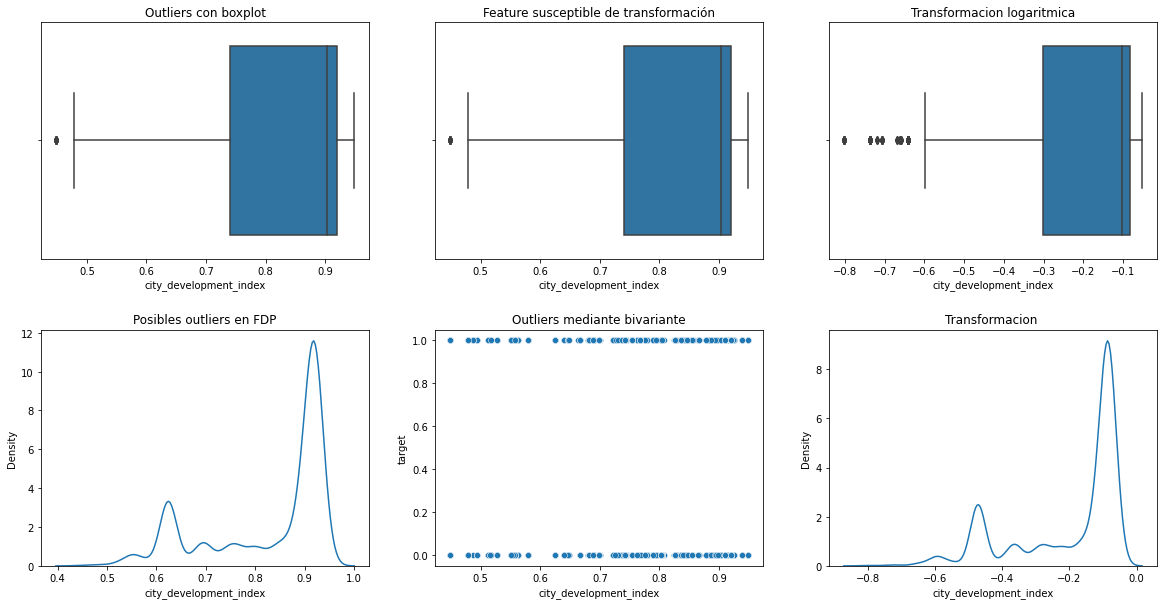

In [13]:
# Target Objetivo en el dataset 
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.3)

# Outliers con boxplot
sns.boxplot(df['city_development_index'], ax=axes[0, 0])
axes[0, 0].set_title("Outliers con boxplot")

# Feature susceptible de transformación
sns.boxplot(df['city_development_index'], ax=axes[0, 1])
axes[0, 1].set_title("Feature susceptible de transformación")

# Transformacion logaritmica
sns.boxplot(np.log(df['city_development_index']), ax=axes[0, 2])
axes[0, 2].set_title("Transformacion logaritmica")

# Posibles outliers mediante FDP
sns.kdeplot(df['city_development_index'], ax=axes[1, 0])
axes[1, 0].set_title("Posibles outliers en FDP")

# Outliers mediante bivariante
sns.scatterplot(data=df, x='city_development_index', y='target', ax=axes[1, 1])
axes[1, 1].set_title("Outliers mediante bivariante")

# Transformacion de FDP
sns.kdeplot(np.log(df["city_development_index"]), ax=axes[1, 2])
axes[1, 2].set_title("Transformacion ");

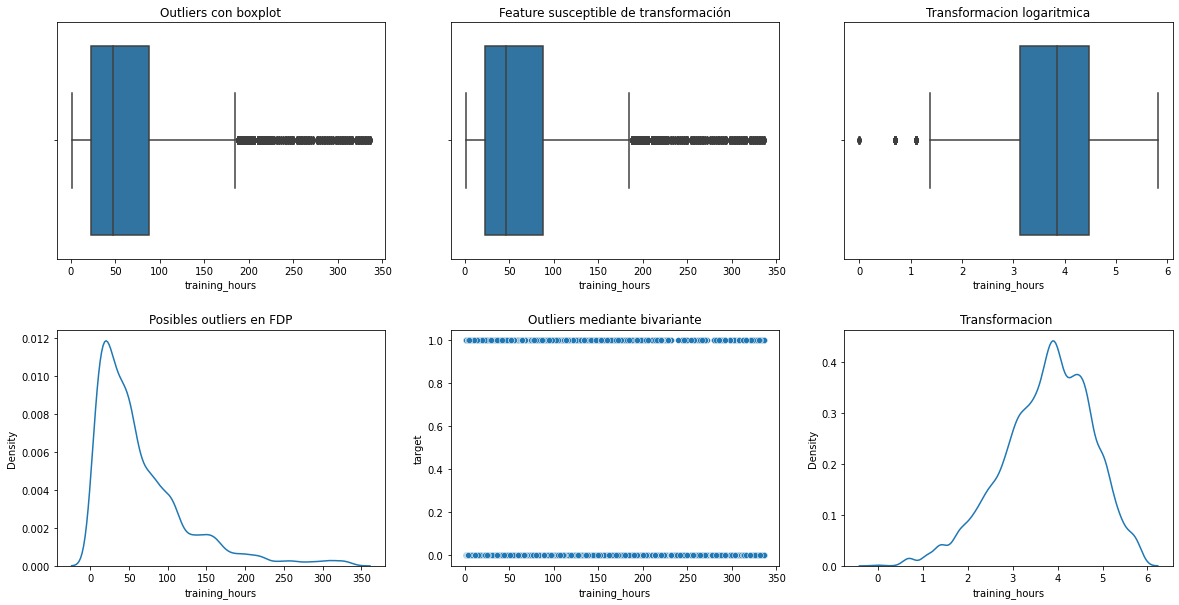

In [14]:
# Target Objetivo en el dataset 
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.3)

# Outliers con boxplot
sns.boxplot(df['training_hours'], ax=axes[0, 0])
axes[0, 0].set_title("Outliers con boxplot")

# Feature susceptible de transformación
sns.boxplot(df['training_hours'], ax=axes[0, 1])
axes[0, 1].set_title("Feature susceptible de transformación")

# Transformacion logaritmica
sns.boxplot(np.log(df['training_hours']), ax=axes[0, 2])
axes[0, 2].set_title("Transformacion logaritmica")

# Posibles outliers mediante FDP
sns.kdeplot(df['training_hours'], ax=axes[1, 0])
axes[1, 0].set_title("Posibles outliers en FDP")

# Outliers mediante bivariante
sns.scatterplot(data=df, x='training_hours', y='target', ax=axes[1, 1])
axes[1, 1].set_title("Outliers mediante bivariante")

# Transformacion de FDP
sns.kdeplot(np.log(df["training_hours"]), ax=axes[1, 2])
axes[1, 2].set_title("Transformacion ");

In [15]:
from collections import Counter

#drop the label 
outlier_list = ['city_development_index', 'training_hours'] 

def detect_outlier(df,feature):
    
    outlier_indices = []
    
    for f in feature:
        
        #lower quartile
        q1 = np.percentile(df[f],25)
        
        #upper quartile
        q3 = np.percentile(df[f],75)
        
        #interquartile range
        iqr = q3-q1
        
        #with coefficient
        with_coef = 1.5*iqr
        
        #detect outlier(s)
        lower_rule = q1-with_coef
        upper_rule = q3+with_coef
        
        outlier_variable = df[(df[f]<lower_rule) | (df[f]>upper_rule)].index
        outlier_indices.extend(outlier_variable)
    
    #converting to amount
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v>2)
    
    return multiple_outliers

 
#drop outliers
df = df.drop(detect_outlier(df,outlier_list),axis=0).reset_index(drop=True)


<a name="analisis"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 4. Análisis y limpieza de los datos 

  Estudio detallado variable por variable.

  Tratamiento de los missings.

  Análisis de las univariables y de las bivariables.


<img src="./img/ml_types.png" alt="drawing" width="650"/>


### City: código de ciudad.

In [16]:
df['city'].unique().tolist()# comprobamos los valores de esta variable.


['city_103',
 'city_40',
 'city_21',
 'city_115',
 'city_162',
 'city_176',
 'city_160',
 'city_46',
 'city_61',
 'city_114',
 'city_13',
 'city_159',
 'city_102',
 'city_67',
 'city_100',
 'city_16',
 'city_71',
 'city_104',
 'city_64',
 'city_101',
 'city_83',
 'city_105',
 'city_73',
 'city_75',
 'city_41',
 'city_11',
 'city_93',
 'city_90',
 'city_36',
 'city_20',
 'city_57',
 'city_152',
 'city_19',
 'city_65',
 'city_74',
 'city_173',
 'city_136',
 'city_98',
 'city_97',
 'city_50',
 'city_138',
 'city_82',
 'city_157',
 'city_89',
 'city_150',
 'city_70',
 'city_175',
 'city_94',
 'city_28',
 'city_59',
 'city_165',
 'city_145',
 'city_142',
 'city_26',
 'city_12',
 'city_37',
 'city_43',
 'city_116',
 'city_23',
 'city_99',
 'city_149',
 'city_10',
 'city_45',
 'city_80',
 'city_128',
 'city_158',
 'city_123',
 'city_7',
 'city_72',
 'city_106',
 'city_143',
 'city_78',
 'city_109',
 'city_24',
 'city_134',
 'city_48',
 'city_144',
 'city_91',
 'city_146',
 'city_133',
 'city_

In [17]:
len(df['city'].unique().tolist())# tenemos sede en 123 ciudades.


123

Como es una columna que tiene demasiados valores y no tiene  información relevante , la eliminamos. La siguiente columna esta relacionada con la demografía y nos aporta más valor.


In [18]:
df.drop(['city'], axis=1,inplace=True)


### City_development_index : índice de desarrollo de la ciudad (escalado).


In [19]:
df['city_development_index'].unique().tolist()# comprobamos los valores de esta variable.


[0.92,
 0.7759999999999999,
 0.624,
 0.789,
 0.767,
 0.764,
 0.762,
 0.913,
 0.926,
 0.8270000000000001,
 0.843,
 0.804,
 0.855,
 0.887,
 0.91,
 0.884,
 0.924,
 0.6659999999999999,
 0.5579999999999999,
 0.923,
 0.794,
 0.754,
 0.939,
 0.55,
 0.865,
 0.698,
 0.893,
 0.7959999999999999,
 0.866,
 0.682,
 0.802,
 0.579,
 0.878,
 0.897,
 0.949,
 0.925,
 0.8959999999999999,
 0.836,
 0.693,
 0.769,
 0.775,
 0.903,
 0.555,
 0.727,
 0.64,
 0.516,
 0.743,
 0.899,
 0.915,
 0.6890000000000001,
 0.895,
 0.89,
 0.847,
 0.527,
 0.7659999999999999,
 0.738,
 0.647,
 0.795,
 0.74,
 0.701,
 0.493,
 0.84,
 0.691,
 0.735,
 0.742,
 0.479,
 0.722,
 0.921,
 0.848,
 0.856,
 0.898,
 0.83,
 0.73,
 0.68,
 0.725,
 0.556,
 0.448,
 0.763,
 0.745,
 0.645,
 0.7879999999999999,
 0.78,
 0.512,
 0.7390000000000001,
 0.563,
 0.518,
 0.8240000000000001,
 0.487,
 0.649,
 0.7809999999999999,
 0.625,
 0.807,
 0.664]

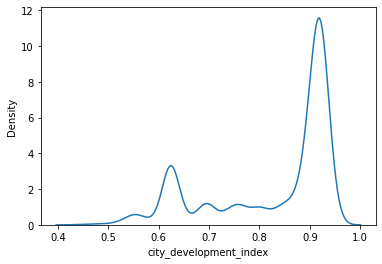

In [20]:
# Comprobamos que el mayor numero de poblaciones tienes alrededor de un 90% de indice de desarrollo.
# Los indices de desarrollo van del 50% al 93 %. Alrededor del 60% también hay un repunte.
sns.kdeplot(data=df, x="city_development_index")


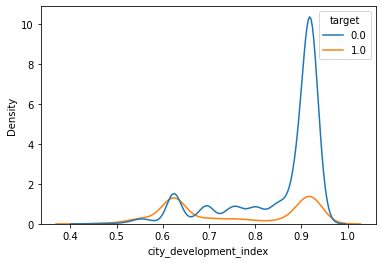

In [21]:
# Aquí podemos ver que las personas que viven en ciudades desarrolladas tienen una menor probabilidad de cambiar de trabajo.
sns.kdeplot(data=df, x="city_development_index", hue="target")


En el siguiente gráfico podemos ver que más personas de ciudades con un índice de desarrollo bajo están buscando un cambio de trabajo porque  están menos satisfechas con su trabajo actual o con el lugar en el que viven.


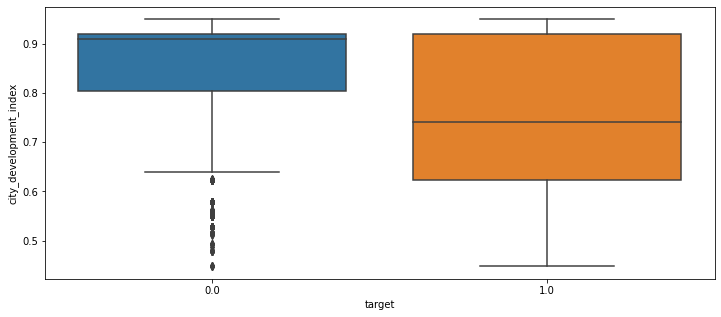

In [22]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='target',y='city_development_index',data=df)
xlabel='Looking for job'
ylabel = 'city_development_index'

### Gender.


In [23]:
# Trabajamos con los valores nulos de esta columna.
df['gender'].value_counts()

Male      13173
Female     1237
Other       191
Name: gender, dtype: int64

Text(0, 0.5, 'Número')

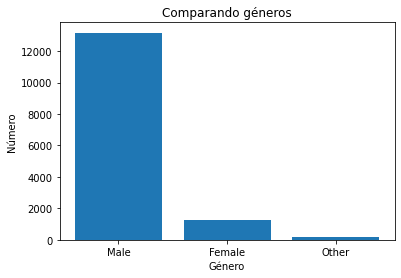

In [24]:
# VISUALIZAMOS LA COLUMNA GENERO.
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = df['gender'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 

# set title and labels 
ax.set_title('Comparando géneros') 
ax.set_xlabel('Género') 
ax.set_ylabel('Número')


In [25]:
df['gender'].isna().sum()# Trabajamos con los valores nulos de esta columna.


4508

In [26]:
# Rellenamos los valores Nan de la columna gender con valores aleatorios masculinos, femeninos a la vez.

from random import choice

mask = df["gender"].isna()

df.loc[mask,["gender"]] = df.loc[mask,["gender"]].applymap(lambda _: choice(["Male","Female"]))

In [27]:
# como vemos nos quedan todavia algunos valores "Other".
df['gender'].value_counts()

Male      15417
Female     3501
Other       191
Name: gender, dtype: int64

In [28]:
df['gender'].isna().sum()

0

In [29]:
# los valores de sexo "Other", son reemplazados por el valor minoritario , para desbalancear un poco.
df['gender'].replace({"Other": "Female"}, inplace=True)


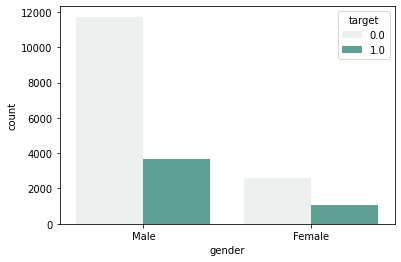

In [30]:
# Visualizamos la columna genero:  target: 0 – Not looking for job change, 1 – Looking for a job change.
# la mayoria de hombre, No buscan un nuevo trabajo. 
# Pero vemos la diferencia abimasl que hay entre hombres y mujeres que buscan un nuevo trabajo. La diferencia entre los que se quedan en la empresa y los que buscan un nuevo trabajo, para los hombres es abismal. Mientras que esta diferencia entre mujeres es mas sutil.

sns.countplot(x=df.gender, hue=df.target, palette='light:#5A9')

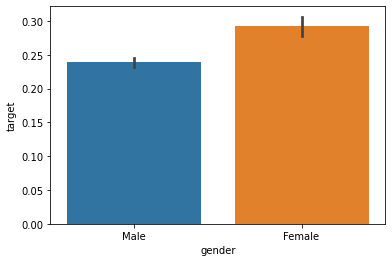

In [31]:
sns.barplot(x="gender", y="target", data=df)
plt.show()
# Mayor porcentaje de mujeres estan buscando un nuevo trabajo-

In [32]:
# Binarizamos male y female feature.
df['Sex_bin'] = df['gender']
df = df.replace({'Sex_bin': {'Male': 0, 'Female': 1}})
df.head(4)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Sex_bin
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0
2,0.624,Female,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1
3,0.789,Male,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,0


In [33]:
# Eliminamos la columna NO Binarizada.
df.drop(['gender'], axis=1,inplace=True)


### Relevent_experience: experiencia relevante del candidato.


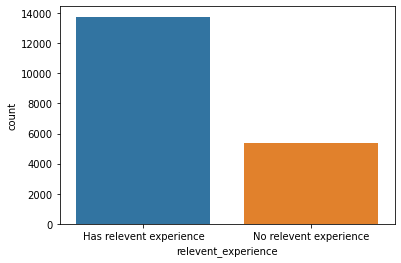

In [34]:
sns.countplot(x=df.relevent_experience)
# podemos comprobar que la gran mayoria de los candidatos poseen experiencia relevante.

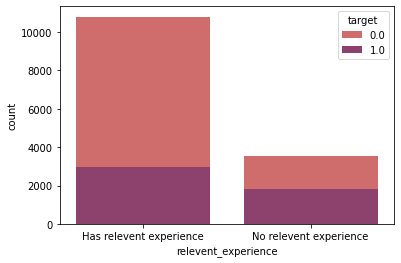

In [35]:
# la mayoria de personas que tiene experiencia , NO  buscan un trabajo nuevo.
sns.countplot(x=df.relevent_experience, hue=df.target, palette='flare', dodge=False) # dodge me permite apilar

In [36]:
pd.crosstab(df['relevent_experience'], df['Sex_bin'], margins=False).apply(lambda r:(r/r.sum())*100, axis=0)
# tenemos las columnas en tanto por ciento.
# Podemos ver que en 75 % de los hombres tiene experiencia relevante frente a un 25%.
# y la diferencia para las mujeres es menor, un 20% menos. La diferencia de la experiencia relevante  entre las mujeres esta mas homogeneizada.


Sex_bin,0,1
relevent_experience,,
Has relevent experience,73.431926,65.763814
No relevent experience,26.568074,34.236186


In [37]:
# Binarizamos Relevent_ experience
df['relev_exp_bin'] = df['relevent_experience']
df = df.replace({'relev_exp_bin': {'Has relevent experience': 1, 'No relevent experience': 0}})


In [38]:
#Eliminamos la columna ya binarizada.
df.drop(['relevent_experience'], axis=1,inplace=True)


### Education Level: nivel de educación del candidato.


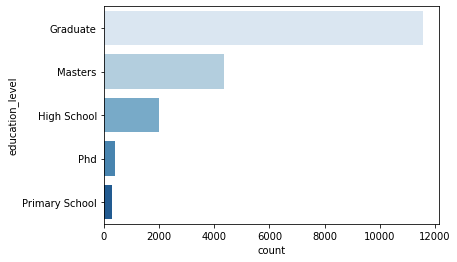

In [39]:
sns.countplot(y= df['education_level'], palette="Blues") 
# Comprobamos que el mayor número de trabajadores poseen un Grado Universitario.

In [40]:
# en esta variable teniamos algunos valores nulos.
df['education_level'].isna().sum()


460

In [41]:
# Rellenamos los valores nulos de esta variable con el valor intermedio, para seguir manteniendo las proporciones.
df['education_level'].fillna('High School', inplace=True)

In [42]:
df['education_level'].isna().sum()


0

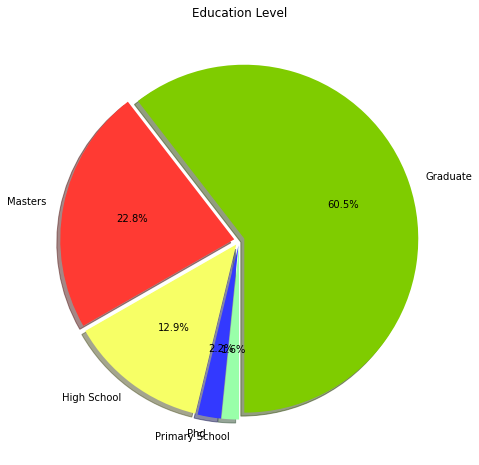

In [43]:
# Visualizamos el gráfico de una forma diferente.
labels = list(df["education_level"].value_counts().index)
values = list(df["education_level"].value_counts().values)

plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct="%1.1f%%",
        colors=["#7fcc00", "#ff3a33", "#f7ff66", "#3339ff", "#99ffa9"],
        shadow=True, explode = [0.03, 0.03, 0.03, 0.03, 0.03],
        startangle=270)
plt.title("Education Level");

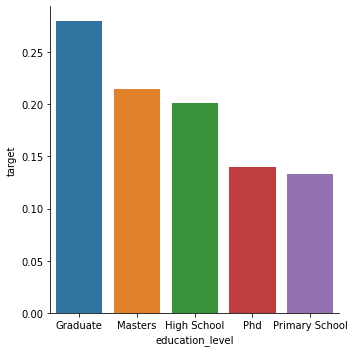

In [44]:
# Comparamos esta variable con la variable objetivo.
sns.catplot(x="education_level", y="target", data=df, kind="bar", ci=None)
# Comprobamos que el mayor numero de personas buscando un nuevo empleo son Graduadas.

### Enrolled_university: tipo de curso universitario inscrito, si lo hubiera.


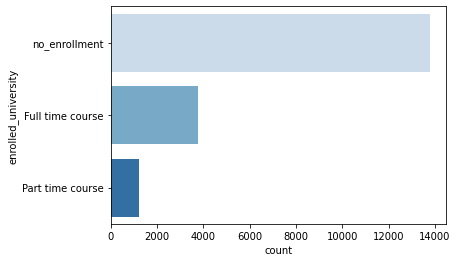

In [45]:
sns.countplot(y= df['enrolled_university'], palette="Blues")
 # Comprobamos esta variable.

No le encuentro sentido a esta variable, ya que el mayor numero de empleados era graduados y aqui aparece  como no apuntandos a la universidad, asi que elimino esta columna.


In [46]:
df.drop(['enrolled_university'],axis=1,inplace=True) 


### Major discipline: disciplina principal de educación del candidato.


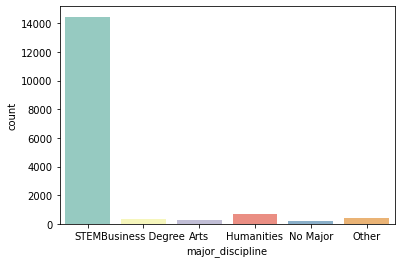

In [47]:
sns.countplot(x=df.major_discipline, palette="Set3")# visualizamos la variable.

In [48]:
# Mayor discipline_ STEM; SCIENCE.
# comparamos esta variable con la variable objetivo
pd.crosstab(index=df["major_discipline"],
                        columns=df["target"], margins=True)


target,0.0,1.0,All
major_discipline,,,
Arts,200,53,253
Business Degree,241,86,327
Humanities,528,141,669
No Major,168,55,223
Other,279,102,381
STEM,10667,3780,14447
All,12083,4217,16300


In [49]:
pd.crosstab(df['major_discipline'], df['target'], margins=False).apply(lambda r:(r/r.sum())*100, axis=0)
# tenemos la comparacion relativa en tanto por ciento


target,0.0,1.0
major_discipline,,
Arts,1.655218,1.256818
Business Degree,1.994538,2.039364
Humanities,4.369776,3.343609
No Major,1.390383,1.304245
Other,2.309029,2.418781
STEM,88.281056,89.637183


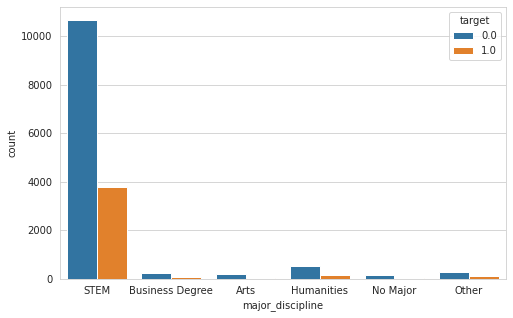

In [50]:
# Mayor discipline_ Visualizamos comparando esta variable con el objetivo.
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'major_discipline',hue='target',data=df)

In [51]:
# esta variable la elimino ya que  el ratio con respecto a la variable objetivo no me aporta mucho valor al modelo.
df.drop(['major_discipline'], axis=1,inplace=True)


### Experience: Experiencia total del candidato en años.


In [52]:
df['experience'].isna().sum()

65

In [53]:
# rellenamos los valores nulos de esta variable.
df['experience'].fillna("0", inplace=True)

In [54]:
df['experience'].isna().sum()

0

In [55]:
# reemplazamos los valores de la columna experience >20 por 21, ya que al convertirlo en numericos da error.
df["experience"].replace({">20": "21","<1":"0"}, inplace=True)

In [56]:
# Convertimos la columna de 'experience' en valores númericos.
df["experience"] = pd.to_numeric(df["experience"])

In [57]:
df["experience"].dtypes

dtype('int64')

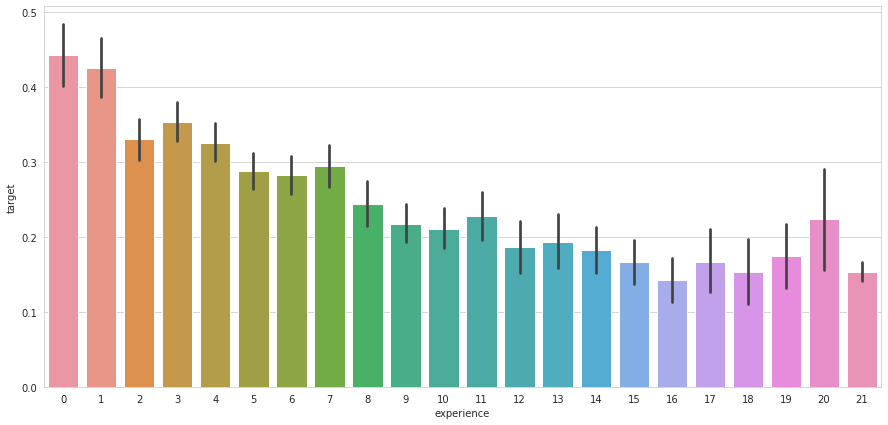

In [58]:
# Comparamos esta variable con la variable objetivo. Observamos una tendecia descendiente.
# A mas años de experiencia, menos probabilidad de buscar un nuevo trabajo.
plt.figure(figsize= [15.0, 7.0])
sns.barplot(x="experience", y="target", data=df)

In [59]:
# Realizamos la discretización del atributo Experience con pd.cut y bins / labels a medida
bins = [0, 5, 10, 15, 20, np.inf]
labels = ['0-5', '5-10', '10-15', '15-20', '+20']
for score in df:
    df['años_experiencia'] = pd.cut(df["experience"], bins=bins, labels=labels)

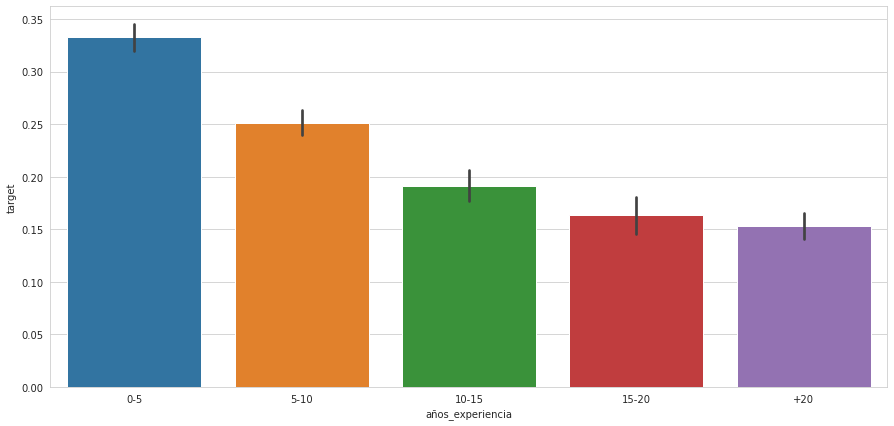

In [60]:
# Comparamos esta variable con la variable objetivo, y observamos la tendencia.
plt.figure(figsize= [15.0, 7.0])
sns.barplot(x="años_experiencia", y="target", data=df)

In [61]:
# Eliminamos columnas ya discretizadas,  para no  repetirlas.
df.drop(['experience'], axis=1,inplace=True)


In [62]:
df['años_experiencia'].isna().sum()

586

### company_size: Número de empleados en la empresa del empleador actual.

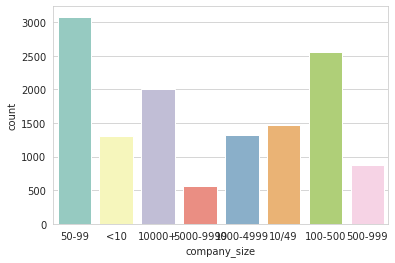

In [63]:
sns.countplot(x=df.company_size, palette="Set3")
# Visualizamos los datos de esta variable.

In [64]:
# Missing values.
df['company_size'].isna().sum()

5920

In [65]:
# Rellenamos los valores NAN de esta columna copiando los valores de la celda anterior y posterior.
df['company_size'].fillna(method='ffill', limit=1, inplace=True)
df['company_size'].fillna(method='bfill', limit=1, inplace=True)

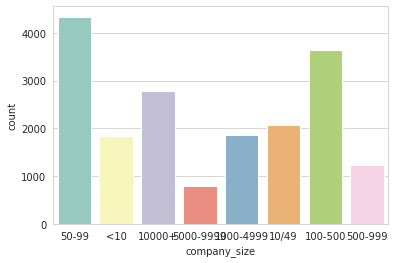

In [66]:
sns.countplot(x=df.company_size, palette="Set3")
# Visualizamos los datos despues de la limpieza.

In [67]:
# Missing values.
df['company_size'].isna().sum()

537

In [68]:
pd.crosstab(df['company_size'], df['target'], margins=False).apply(lambda r:(r/r.sum())*100, axis=0)
# Comparamos esta variable con la variable objetivo
# Tenemos la comparación en tanto por ciento


target,0.0,1.0
company_size,,
10/49,10.446486,13.579157
100-500,19.774977,18.944579
1000-4999,10.396639,8.920291
10000+,15.089368,14.903952
50-99,23.314107,23.537205
500-999,6.736452,6.270700
5000-9999,4.165777,4.438066
<10,10.076195,9.406050


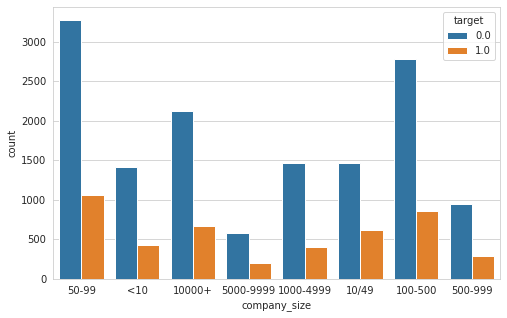

In [69]:
# Visualizamos esta comparación.
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'company_size',hue='target',data=df)

Discretizamos esta variable para reducir valores en :grande , mediana y pequeña empresa.

In [70]:
# reemplazo los valores de esta variable, en vez de por intervalo por 
df['company_size'] = df.company_size.replace({'50-99':"Mediana",
"<10":"Pequeña",
"10000+":"Gran_empresa",
"5000-9999": "Gran_empresa",
"1000-4999":"Gran_empresa",
"10/49":"Pequeña",
"100-500":"Mediana",
"500-999":"Gran_empresa"})


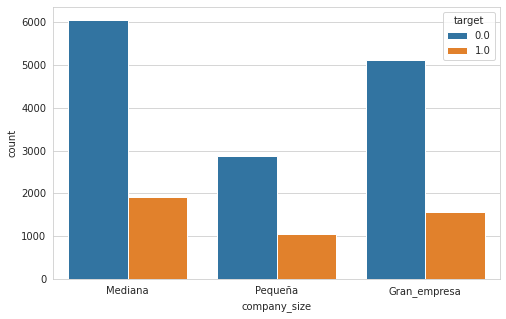

In [71]:
#Comprobamos que el mayor numero de persona que buscan o no trabajo, se encuentran en la mediana empresa.
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'company_size',hue='target',data=df)

In [72]:
# Reemplazamos valores nulos con la variable minoritaria para desbalancear.
df['company_size'] = df.company_size.fillna("Pequeña")


In [73]:
# Missing values.
df['company_size'].isna().sum()

0

### Company Type: tipo de empleador actual.

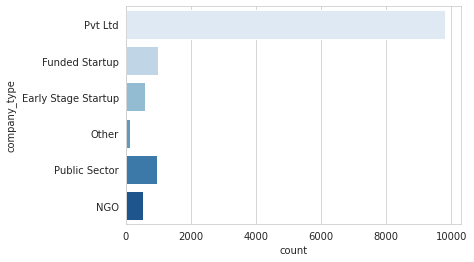

In [74]:
# Visualizamos los datos.
sns.countplot(y= df['company_type'], palette="Blues") # invertimos el eje
# Sociedad de responsabilidad limitada (Private limited company)


In [75]:
# Reemplazamos valores nulos con la variable minoritaria para desbalancear.
df['company_type'] = df.company_type.fillna("Other")

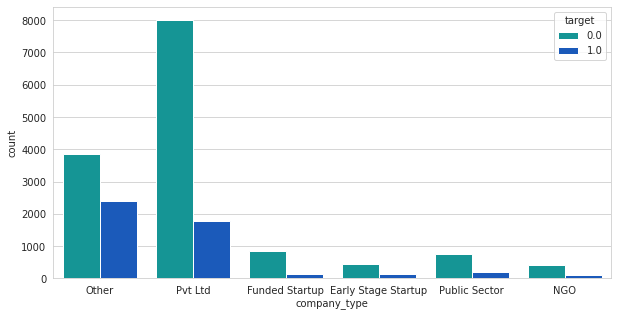

In [76]:
# comparamos con la variable.
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'company_type',hue='target',data=df,palette='winter_r')

In [77]:
# Unimos las variable StarUp
df['company_type'] = df['company_type'].replace({
"Early Stage Startup":"Startup",
"Funded Startup":"Startup",})

In [78]:
df.groupby(['company_type']).count()

,city_development_index,education_level,company_size,last_new_job,training_hours,target,Sex_bin,relev_exp_bin,años_experiencia
company_type,,,,,,,,,
NGO,521,521,521,512,521,521,521,521,500
Other,6243,6243,6243,5997,6243,6243,6243,6243,5915
Public Sector,953,953,953,934,953,953,953,953,937
Pvt Ltd,9788,9788,9788,9667,9788,9788,9788,9788,9602
Startup,1604,1604,1604,1576,1604,1604,1604,1604,1569


In [79]:
pd.crosstab(df['company_type'], df['target'], margins=False).apply(lambda r:(r/r.sum())*100, axis=0)
# tenemos la comparacion relativa en tanto por ciento


target,0.0,1.0
company_type,,
NGO,2.955940,2.035677
Other,26.763804,50.451207
Public Sector,5.179866,4.407135
Pvt Ltd,55.883993,37.187828
Startup,9.216397,5.918153


### Last new job: diferencia en años entre el trabajo anterior y el trabajo actual,es decir, cuantos años lleva en esta empresa.


In [80]:
# Missing values
df['last_new_job'].fillna('never', inplace=True)

In [81]:
# reemplazamos los valores de la columna experience >20 por 21, ya que al convertirlo en numericos da error.
df["last_new_job"].replace({">4": "5","never":"0"}, inplace=True)

In [82]:
# Convertimos la columna de 'experience' en valores númericos.
df["last_new_job"] = pd.to_numeric(df["last_new_job"])

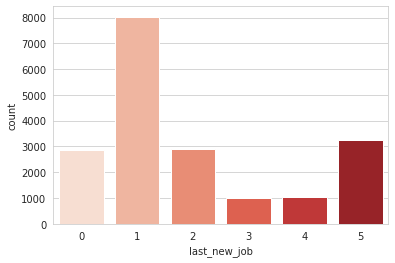

In [83]:
sns.countplot(x=df.last_new_job, palette="Reds")
# comprobamos que el mayor numero de candidatos, tenian un año de experiencia en su puesto de trabajo anterior.

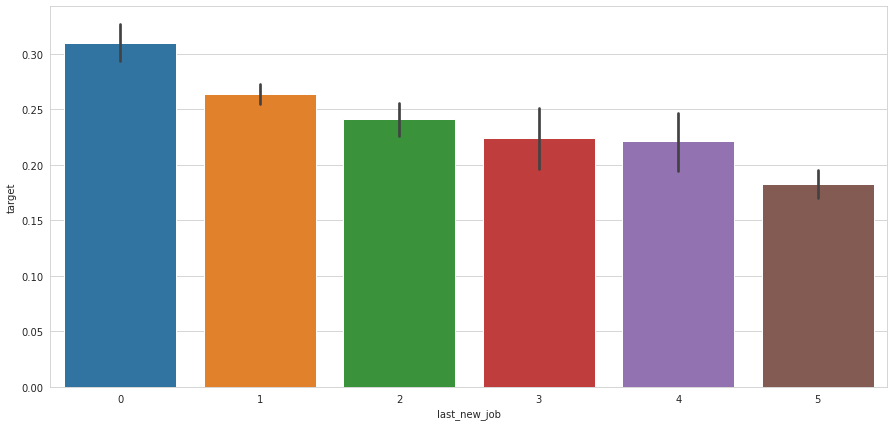

In [84]:
plt.figure(figsize= [15.0, 7.0])# en esta gráfica podemos observar como el porcentaje de personas que buscan un nuevo empleo se va reduciendo conforme tiene mas años en su puesto de trabajo.
sns.barplot(x="last_new_job", y="target", data=df)

### Training hours: horas de formación completadas.


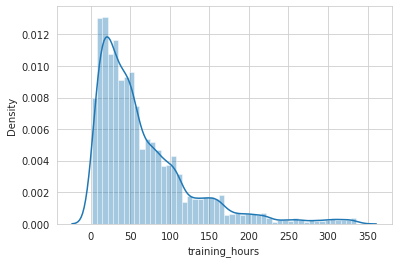

In [85]:
sns.distplot(df.training_hours);
# Visualizamos esta variable , podemos comprobar que el mayor numero de formación , se encuentra entre 0 y 50 horas completadas.

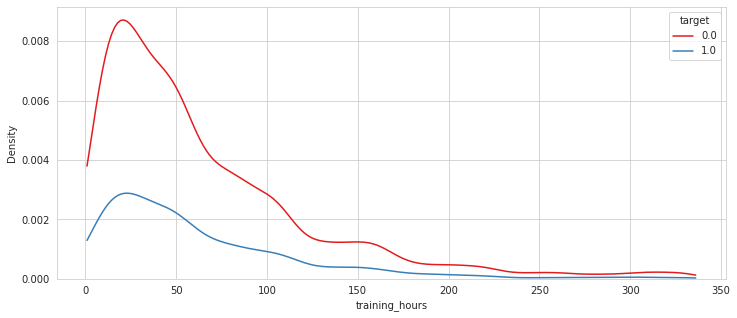

In [86]:
plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')
sns.kdeplot(data=df, x="training_hours", hue="target",cut = 0,palette='Set1')
# Aquí podemos ver que solo a unos pocos empleados se les ha ofrecido una capacitación de más de 100 horas.


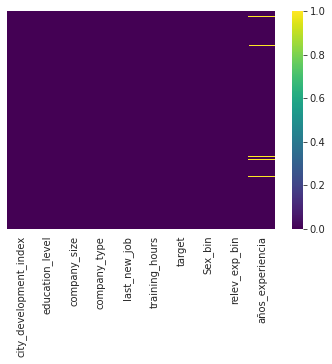

In [87]:
# COMPROBAMOS QUE NO QUEDAN VALORES NULOS.
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [89]:
# Eliminamos los pocos valores nulos que nos quedan.
df.dropna(inplace=True)


<a name="ML"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 5. Empezamos Machine Learning</a></dt>
  Train, Test

<img src="./img/ml_types.png" alt="drawing" width="650"/>


Estandarización y binarización de variables categóricas.

In [90]:
# data estandarizacion
from sklearn import preprocessing
cols_to_standarize = ['training_hours','last_new_job']
for col in cols_to_standarize:
  df[col] = preprocessing.scale(df[col], axis=0, copy=False)

In [91]:
# get dummies
categorical_feature = (df.dtypes == "category") | (df.dtypes == object)
categorical_cols = df.columns[categorical_feature].tolist()
df = pd.get_dummies(df, columns=categorical_cols)

Selecionamos las mejores variables con el método **SelectKBest**.

In [92]:
# Realizamos el train_test_split 80-20
X = df.drop(['target'], axis = 1)
y = df['target']

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [95]:
selector = SelectKBest(score_func=f_classif)
X_new = selector.fit_transform(X, y)

scores = sorted(zip(map(lambda x: round(x, 4), selector.scores_), X.columns), reverse=True)
pd.DataFrame(scores, columns=['Score', 'target']).head(6)

,Score,target
0,2342.3958,city_development_index
1,932.1820,company_type_Other
2,488.9120,company_type_Pvt Ltd
3,382.1923,años_experiencia_0-5
4,292.0214,relev_exp_bin
5,175.9425,años_experiencia_+20


In [96]:
X=df[['city_development_index','company_type_Other','company_type_Pvt Ltd','años_experiencia_+20','años_experiencia_0-5','relev_exp_bin']]

In [97]:
y = df['target']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1, stratify=df['target'])

In [99]:
y_train.value_counts()

0.0    11213
1.0     3605
Name: target, dtype: int64

In [101]:
from imblearn.over_sampling import SMOTE 


In [102]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [103]:
y_res.value_counts()

1.0    11213
0.0    11213
Name: target, dtype: int64

In [104]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier

In [105]:
cv = StratifiedKFold(n_splits=10, shuffle = True, random_state=42)

In [106]:
pipelines = {
    'rf': make_pipeline(RandomForestClassifier(random_state=42)),
    'gb': make_pipeline(GradientBoostingClassifier(random_state=42)),
    'l1': make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state= 1,solver='liblinear')),
    'l2': make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state= 1,solver='liblinear')),
    'dt': make_pipeline(DecisionTreeClassifier(random_state=42)),
    'knn': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'svc':make_pipeline(StandardScaler(),SVC(random_state=42))
}

In [107]:
for key, value in pipelines.items():
    print(key, type(value))

rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>
l1 <class 'sklearn.pipeline.Pipeline'>
l2 <class 'sklearn.pipeline.Pipeline'>
dt <class 'sklearn.pipeline.Pipeline'>
knn <class 'sklearn.pipeline.Pipeline'>
svc <class 'sklearn.pipeline.Pipeline'>


In [108]:
rf_hyperparameters = {
    'randomforestclassifier__criterion':['entropy','gini'],
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_features': ['auto', 0.3, 0.6],
    'randomforestclassifier__min_samples_split':[2,3,10],
    'randomforestclassifier__min_samples_leaf':[1,3,10],
    'randomforestclassifier__bootstrap':[True, False]
}

gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators':[100, 500, 100],
    'gradientboostingclassifier__learning_rate': [0.001,0.01,0.1,0.05],
    'gradientboostingclassifier__max_depth':[3, 5, 10]
}

l1_hyperparameters = {
    'logisticregression__C': np.logspace(-3,3,7)
}
l2_hyperparameters = {
    'logisticregression__C': np.logspace(-3,3,7)
}
dt_hyperparameters = {
    "decisiontreeclassifier__max_depth" : [1,3,5,7],
    'decisiontreeclassifier__criterion':['entropy','gini'],
    'decisiontreeclassifier__splitter':['best']
}

knn_hyperparameters = {
    "kneighborsclassifier__n_neighbors": np.arange(1,50),
    "kneighborsclassifier__weights": ["uniform","distance"]
}
svc_hyperparameters = {
    'svc__C': [1.0,], 
    'svc__kernel': ['rbf',], 
    'svc__degree': [2,], 
    'svc__gamma' : [1.0,], 
    'svc__shrinking':[True,], 
    'svc__probability':[True,],
    'svc__tol': [0.001,],
    'svc__cache_size':[200,]
}


In [109]:
hyperparameter_grids = {
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters,
    'l1':l1_hyperparameters,
    'l2':l2_hyperparameters,
    'dt':dt_hyperparameters,
    'knn': knn_hyperparameters,
    'svc':svc_hyperparameters
}

In [110]:
for key in ['rf', 'gb', 'l1', 'l2', 'dt', 'knn', 'svc']:
    if key in hyperparameter_grids:
        if type(hyperparameter_grids[key]) is dict:
            print( key, 'was found, and it is a grid.' )
        else:
            print( key, 'was found, but it is not a grid.' )
    else:
        print( key, 'was not found')

rf was found, and it is a grid.
gb was found, and it is a grid.
l1 was found, and it is a grid.
l2 was found, and it is a grid.
dt was found, and it is a grid.
knn was found, and it is a grid.
svc was found, and it is a grid.


In [111]:
models = {}

for key in pipelines.keys():
    models[key]= GridSearchCV(pipelines[key], hyperparameter_grids[key], cv=cv, scoring = 'roc_auc',
                             n_jobs= -1,
                             verbose = 1)
    
models.keys()

dict_keys(['rf', 'gb', 'l1', 'l2', 'dt', 'knn', 'svc'])

In [ ]:
best_estimators = []

for key in models.keys():
    clf = models[key].fit(X_res,y_res)
    best_estimators.append(clf.best_estimator_)
    print(key, "is trained and tuned")
    print('Method: {} Best: {}' .format(key,clf.best_estimator_))

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


In [ ]:
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

In [ ]:
for key in models.keys() :
    pred = models[key].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    print(key)
    print('AUROC =', round(auc(fpr, tpr), 4))
    print('---')

In [ ]:
voting_c = VotingClassifier(estimators=[('rf',best_estimators[0]),
                                        ('gb',best_estimators[1]),
                                        ('l1',best_estimators[2]),
                                        ('l2',best_estimators[3]),
                                        ('dt',best_estimators[4]),
                                        ('knn', best_estimators[5]),
                                        ('svc', best_estimators[6])
                                       ],
                           voting='soft',
                           n_jobs=-1)
print(voting_c)

In [ ]:
voting_c = voting_c.fit(X_res,y_res)
print("Score del modelo (accuracy):", round(voting_c.score(X_test, y_test), 3))
print("Accuracy score:", round(accuracy_score(voting_c.predict(X_test), y_test), 3))
print("Recall score:", round(recall_score(voting_c.predict(X_test), y_test), 3))
print("Precision score:", round(precision_score(voting_c.predict(X_test), y_test), 3))
print("F1 score:", round(f1_score(voting_c.predict(X_test), y_test), 3))
print("AUC:", round(roc_auc_score(voting_c.predict(X_test), y_test), 3))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Score del modelo (accuracy): 0.733
Accuracy score: 0.733
Recall score: 0.47
Precision score: 0.554
F1 score: 0.508
AUC: 0.656


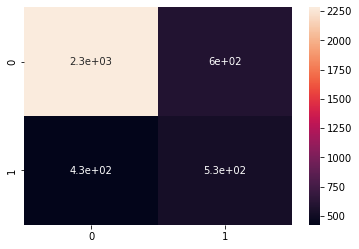

In [ ]:
c_matrix = confusion_matrix(y_test, voting_c.predict(X_test))
sns.heatmap(c_matrix, annot=True)

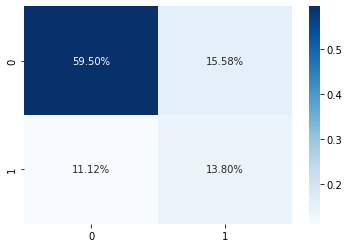

In [ ]:
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');